In [1]:
import pandas as pd
import numpy as np
import formula1 as f1

In [41]:
master = pd.DataFrame()

for n in range(1996, 2022):
    temp = pd.DataFrame()
    for i in range(1, 25):
        try:
            quali = f1.get_qualifying_result(n, i)
            race = f1.get_race_result(n, i)
            quali.rename(columns={'position': 'qualipos'}, inplace=True)
            quali['race'] = i
            quali = quali[['race', 'driverID', 'qualipos']]
            quali = quali.sort_values('driverID')
            quali = quali.set_index('driverID')
            race['race'] = i
            race.rename(columns={'position': 'racepos'}, inplace=True)
            race = race[['race', 'driverID', 'racepos']]
            race = race.sort_values('driverID')
            race = race.set_index('driverID')
            temp = temp.append(quali)
            temp['racepos'] = race['racepos']
        except IndexError:
            break
    master = master.append(temp)


In [42]:
master = master.reset_index()
"""master = master[master.driverID != 'mazepin']
master = master[master.driverID != 'marques']
master = master[master.driverID != 'larini']
master = master[master.driverID != 'panis']
master = master[master.driverID != 'morbidelli']
master = master[master.driverID != 'wurz']
master = master[master.driverID != 'grosjean']
master = master[master.driverID != 'kubica']"""

dropdfs = master[master['racepos'].isnull()]



In [53]:
indexlist = dropdfs.index

In [56]:
indexlistarray = np.array(indexlist)


In [58]:
master.drop(indexlistarray, inplace=True)

In [68]:
master2 = pd.DataFrame()
master2['qualipos'] = master['qualipos'].astype(int)
master2['racepos'] = master['racepos'].astype(int)

In [70]:
master2 = master2[master2.qualipos <= 10]
master2 = master2[master2.racepos <= 10]

In [85]:
x = master['qualipos'].astype(int)
y = master['racepos'].astype(int)

In [64]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
from scipy.stats import linregress  

0.5373809872217583 5.083940997722036 0.5317539476535762 0.0 0.009803218179475714
0.28


/var/folders/ry/nqgxl42n3vjg1sj6zlxsr0rr0000gn/T/ipykernel_2045/3536358846.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model.fit(x[:, np.newaxis], y)


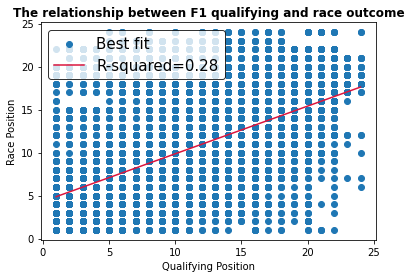

In [83]:
poly_model = make_pipeline(PolynomialFeatures(10), LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 2)
yfit = poly_model.predict(xfit[:, np.newaxis])

# Plotting data
plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson')
plt.xlabel('Qualifying Position')
plt.ylabel('Race Position')

# Additional statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
r_squared="{:.2f}".format(r_value**2)

# Formatting
plt.legend(('Best fit', 'R-squared={}'.format(r_squared)), fontsize=15, loc="upper left", borderpad=0.4, edgecolor="black")
plt.title("The relationship between F1 qualifying and race outcome", fontweight="bold")

print(slope, intercept, r_value, p_value, std_err)
print(r_squared)

In [80]:
master['qualipos'] = master['qualipos'].astype(int)
master['racepos'] = master['racepos'].astype(int)


In [87]:
master.to_csv('qualirace.csv')

/var/folders/ry/nqgxl42n3vjg1sj6zlxsr0rr0000gn/T/ipykernel_2045/796523177.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Race')

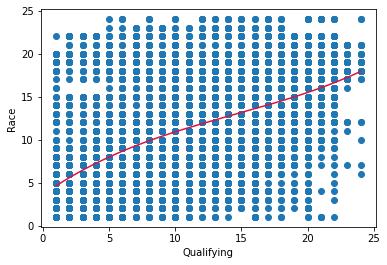

In [86]:
poly_model = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson')
plt.xlabel('Qualifying')
plt.ylabel('Race')